#### MTA Project  - Canal Street Small Business Association
###### In this notebook
- Data from September to November 2019
- Final result output ot csv



In [73]:
reset -fs

In [74]:
import pandas as pd
import numpy as np
import sqlalchemy as alchem
from sqlalchemy import inspect
from sqlalchemy import create_engine 
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [75]:
engine = create_engine("sqlite:///sep_nov_2019.db")
engine.connect()

In [76]:
# """
# In the next few cells, I just experiment with sqlalchemy and syntax. Here I'm creating a variable
# to define my column selections use it as part of string literal in a query
# """

# columns_to_select = ['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']
# my_select = 'SELECT '

# for name in columns_to_select:
#     my_select = my_select + name +', '
# my_select = my_select[:-2]
# my_select

In [77]:

# """
# Just a test a to put a query in a dataframe
# """

# test_df = pd.read_sql(f'{my_select}\
#                       FROM  mta_data WHERE STATION = "CANAL ST";', 
#                        engine)
# test_df.sort_values("DATE").tail()

In [78]:
# test_df.info()

In [79]:
# test_df.columns

In [80]:
"""
Looking at recovery audits with a sqlalchemy query
"""

pd.read_sql('SELECT *\
                      FROM  mta_data WHERE STATION = "CANAL ST" \
                      AND NOT DESC  =  "REGULAR" \
                      ;', \
                       engine)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,R119,R320,00-00-02,CANAL ST,1,IRT,11/11/2019,00:00:00,RECOVR AUD,582753,180054
1,A066,R118,00-00-00,CANAL ST,JNQRZ6W,BMT,11/02/2019,01:00:00,RECOVR AUD,1723353800,1763254482
2,A066,R118,00-00-00,CANAL ST,JNQRZ6W,BMT,11/02/2019,05:00:00,RECOVR AUD,1723353744,1763254513
3,A066,R118,00-00-01,CANAL ST,JNQRZ6W,BMT,11/02/2019,01:00:00,RECOVR AUD,10210691,3345723
4,A066,R118,00-00-01,CANAL ST,JNQRZ6W,BMT,11/02/2019,05:00:00,RECOVR AUD,10210764,3345749
5,A066,R118,00-00-02,CANAL ST,JNQRZ6W,BMT,11/02/2019,01:00:00,RECOVR AUD,339740967,2031197982
6,A066,R118,00-00-02,CANAL ST,JNQRZ6W,BMT,11/02/2019,05:00:00,RECOVR AUD,339741012,2031197999
7,A046,R463,00-05-01,CANAL ST,JNQRZ6W,BMT,10/29/2019,01:00:00,RECOVR AUD,0,1175
8,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,10/16/2019,21:00:00,RECOVR AUD,371449414,456184755
9,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,10/17/2019,01:00:00,RECOVR AUD,371449488,456184774


In [81]:
"""
At this point I have conducted some exploration and analyis with sqlalchemey queries. I pull data
into a dataframe, excluding any rows where DESC is not "REGULAR". This exlcudes all rows with 
audit resets.
"""
 
df = pd.read_sql('SELECT *\
            FROM  mta_data \
            WHERE STATION = "CANAL ST" AND DESC = "REGULAR" '\
            , engine).drop('DIVISION', axis = 1)
df

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,371502903,456269207
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,04:00:00,REGULAR,371502912,456269210
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,08:00:00,REGULAR,371502916,456269234
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,12:00:00,REGULAR,371502950,456269368
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,16:00:00,REGULAR,371503116,456269537
...,...,...,...,...,...,...,...,...,...,...
31637,R120,R320,01-00-02,CANAL ST,1,09/06/2019,05:00:00,REGULAR,1421028,8068916
31638,R120,R320,01-00-02,CANAL ST,1,09/06/2019,09:00:00,REGULAR,1421049,8069278
31639,R120,R320,01-00-02,CANAL ST,1,09/06/2019,13:00:00,REGULAR,1421096,8069769
31640,R120,R320,01-00-02,CANAL ST,1,09/06/2019,17:00:00,REGULAR,1421248,8070022


In [82]:
"""
Analyzing time interval consistency by line name. 
A bit of a mess that will require further detailed analysis
"""

time_set_ACE = set(df[df.LINENAME == 'ACE'].TIME)
time_set_J = set(df[df.LINENAME == 'JNQRZ6W'].TIME)
time_set_1 = set(df[df.LINENAME == '1'].TIME)

print('line ACE \n', time_set_ACE)
print('-----------------------')
print('line JNQRZ6W\n', time_set_J)
print('-----------------------')
print('line 1\n', time_set_1)

line ACE 
 {'07:00:00', '12:00:00', '04:00:00', '08:00:00', '00:00:00', '11:00:00', '20:00:00', '23:00:00', '19:00:00', '16:00:00', '15:00:00', '03:00:00'}
-----------------------
line JNQRZ6W
 {'01:27:38', '05:00:00', '09:00:00', '12:00:00', '04:00:00', '08:00:00', '17:00:00', '00:00:00', '21:00:00', '01:00:00', '20:00:00', '03:54:40', '13:00:00', '16:00:00', '11:33:54', '11:34:02'}
-----------------------
line 1
 {'05:00:00', '09:00:00', '12:00:00', '04:00:00', '08:00:00', '17:00:00', '00:00:00', '21:00:00', '01:00:00', '20:00:00', '16:00:00', '13:00:00'}


In [83]:
"""
Unlike the data from 2021, this data does not appear to contain duplicates or anomalies

"""

mask1 = ((df['LINENAME'] == 'JNQRZ6W') 
        &((df['TIME'] == '03:54:40') 
        | (df['TIME'] == '01:27:38')
        | (df['TIME'] == '11:33:54') 
        | (df['TIME'] == '11:34:02')
        | (df['TIME'] == '08:27:53'))
        )

df[mask1].sort_values(['UNIT','SCP', 'TIME'])


# mask2 = ((df['LINENAME'] == 'JNQRZ6W') 
#         & (df['DATE'] == '08/30/2021') 
# #         & (df['CA'] == 'A043')
#         & (df['UNIT'] == 'R462')
# #         & (df['UNIT'] == 'R463')
# #           & (df['UNIT'] == 'R118')
# #         & (df['SCP'] == '00-00-00')
        
#         &((df['TIME'] == '07:58:22') 
#         | (df['TIME'] == '07:54:16')
#         | (df['TIME'] == '07:56:57') 
#         | (df['TIME'] == '07:59:43')
#         | (df['TIME'] == '08:27:53')
#         | (df['TIME'] == '04:00:00')
#          )
#        )



# df[mask2]

# mask3 = ((df['LINENAME'] == 'JNQRZ6W') 
#         & (df['DATE'] == '09/06/2021') 
# #         & (df['CA'] == 'A043')
#         & (df['UNIT'] == 'R462')
#         )
         
# df[mask3]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS
13,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/25/2019,03:54:40,REGULAR,371503827,456269937
16,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/25/2019,11:33:54,REGULAR,371503943,456271216
57,A043,R462,00-00-01,CANAL ST,JNQRZ6W,11/25/2019,03:54:40,REGULAR,355513910,440754589
60,A043,R462,00-00-01,CANAL ST,JNQRZ6W,11/25/2019,11:33:54,REGULAR,355514014,440756092
101,A043,R462,00-00-02,CANAL ST,JNQRZ6W,11/25/2019,03:54:40,REGULAR,14130609,13481655
104,A043,R462,00-00-02,CANAL ST,JNQRZ6W,11/25/2019,11:33:54,REGULAR,14130871,13483448
145,A043,R462,00-03-00,CANAL ST,JNQRZ6W,11/25/2019,03:54:40,REGULAR,5485440,3876096
148,A043,R462,00-03-00,CANAL ST,JNQRZ6W,11/25/2019,11:33:54,REGULAR,5485687,3876447
189,A043,R462,00-03-01,CANAL ST,JNQRZ6W,11/25/2019,03:54:40,REGULAR,5178371,1761330
192,A043,R462,00-03-01,CANAL ST,JNQRZ6W,11/25/2019,11:33:54,REGULAR,5178478,1761478


In [84]:
"""
Checking another odd time stamp. Data seems ok
"""


df[df['TIME'] == '23:00:00'].groupby(["LINENAME", 'DATE', 'TIME']).sum()

mask = ((df['LINENAME'] == 'ACE') 
#         & (df['DATE'] == '08/30/2021')
#         & (df['DATE'] == '09/13/2021')
        &((df['TIME'] == '09:54:27') 
        | (df['TIME'] == '07:00:00')
        | (df['TIME'] == '11:00:00') 
        | (df['TIME'] == '15:00:00') 
        | (df['TIME'] == '19:00:00')
        | (df['TIME'] == '23:00:00')
         )
       )

df[mask]


,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS
1447,N089,R139,00-00-00,CANAL ST,ACE,11/23/2019,07:00:00,REGULAR,6217359,16891773
1448,N089,R139,00-00-00,CANAL ST,ACE,11/23/2019,11:00:00,REGULAR,6217395,16892221
1449,N089,R139,00-00-00,CANAL ST,ACE,11/23/2019,15:00:00,REGULAR,6217523,16892866
1450,N089,R139,00-00-00,CANAL ST,ACE,11/23/2019,19:00:00,REGULAR,6217707,16893525
1451,N089,R139,00-00-00,CANAL ST,ACE,11/23/2019,23:00:00,REGULAR,6217849,16893818
...,...,...,...,...,...,...,...,...,...,...
9545,N090,R139,01-06-01,CANAL ST,ACE,11/08/2019,07:00:00,REGULAR,463990,89994
9546,N090,R139,01-06-01,CANAL ST,ACE,11/08/2019,11:00:00,REGULAR,463992,90027
9547,N090,R139,01-06-01,CANAL ST,ACE,11/08/2019,15:00:00,REGULAR,463993,90068
9548,N090,R139,01-06-01,CANAL ST,ACE,11/08/2019,19:00:00,REGULAR,463998,90141


In [85]:
"""
Binning all time intervals to a consistent '00:00:00', '04:00:00', '08:00:00' '12:00:00' '16:00:00' '20:00:00'

"""

df['TIME'] = np.where(df['TIME'] == '01:00:00', '00:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '01:27:38', '00:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '03:00:00', '04:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '03:54:40', '04:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '05:00:00', '04:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '07:00:00', '08:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '07:59:43', '08:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '07:54:16', '08:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '08:27:53', '08:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '09:00:00', '08:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '09:54:27', '12:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '11:00:00', '12:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '11:34:02', '12:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '11:33:54', '12:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '13:00:00', '12:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '15:00:00', '16:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '17:00:00', '16:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '19:00:00', '20:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '21:00:00', '20:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '23:00:00', '20:00:00',df['TIME'])

In [86]:
"""
Great. All my time intervals are binned consistently across all lines
"""

time_set_ACE = set(df[df.LINENAME == 'ACE'].TIME)
time_set_J = set(df[df.LINENAME == 'JNQRZ6W'].TIME)
time_set_1 = set(df[df.LINENAME == '1'].TIME)

print('line ACE \n', time_set_ACE)
print('-----------------------')
print('line JNQRZ6W\n', time_set_J)
print('-----------------------')
print('line 1\n', time_set_1)

line ACE 
 {'12:00:00', '04:00:00', '08:00:00', '00:00:00', '20:00:00', '16:00:00'}
-----------------------
line JNQRZ6W
 {'12:00:00', '04:00:00', '08:00:00', '00:00:00', '20:00:00', '16:00:00'}
-----------------------
line 1
 {'12:00:00', '04:00:00', '08:00:00', '00:00:00', '20:00:00', '16:00:00'}


In [87]:
"""
Add time stamp column
"""
df['date_time'] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,371502903,456269207,2019-11-23 00:00:00
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,04:00:00,REGULAR,371502912,456269210,2019-11-23 04:00:00
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,08:00:00,REGULAR,371502916,456269234,2019-11-23 08:00:00
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,12:00:00,REGULAR,371502950,456269368,2019-11-23 12:00:00
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,16:00:00,REGULAR,371503116,456269537,2019-11-23 16:00:00


In [88]:
"""
Add day name and number columns
"""

df['day_num'] = df['date_time'].dt.dayofweek
df['day_name'] = df['date_time'].dt.day_name()

df.head()

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,371502903,456269207,2019-11-23 00:00:00,5,Saturday
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,04:00:00,REGULAR,371502912,456269210,2019-11-23 04:00:00,5,Saturday
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,08:00:00,REGULAR,371502916,456269234,2019-11-23 08:00:00,5,Saturday
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,12:00:00,REGULAR,371502950,456269368,2019-11-23 12:00:00,5,Saturday
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,16:00:00,REGULAR,371503116,456269537,2019-11-23 16:00:00,5,Saturday


In [89]:

"""
Will drop data from last week of August to have clean  three months
"""

filtered_df = df.loc[(df['date_time'] <= '2019-09-01')]
filtered_df
mask_aug = (df['date_time'] <= '2019-09-01')
df[mask_aug]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name
29213,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/31/2019,00:00:00,REGULAR,371370779,456070130,2019-08-31 00:00:00,5,Saturday
29214,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/31/2019,04:00:00,REGULAR,371370810,456070136,2019-08-31 04:00:00,5,Saturday
29215,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/31/2019,08:00:00,REGULAR,371370854,456070308,2019-08-31 08:00:00,5,Saturday
29216,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/31/2019,12:00:00,REGULAR,371371072,456071081,2019-08-31 12:00:00,5,Saturday
29217,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/31/2019,16:00:00,REGULAR,371371709,456072138,2019-08-31 16:00:00,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31602,R120,R320,01-00-02,CANAL ST,1,08/31/2019,08:00:00,REGULAR,1419844,8064052,2019-08-31 08:00:00,5,Saturday
31603,R120,R320,01-00-02,CANAL ST,1,08/31/2019,12:00:00,REGULAR,1419868,8064174,2019-08-31 12:00:00,5,Saturday
31604,R120,R320,01-00-02,CANAL ST,1,08/31/2019,16:00:00,REGULAR,1419907,8064356,2019-08-31 16:00:00,5,Saturday
31605,R120,R320,01-00-02,CANAL ST,1,08/31/2019,20:00:00,REGULAR,1419938,8064477,2019-08-31 20:00:00,5,Saturday


In [90]:
df.drop(df[mask_aug].index, inplace = True)
# df[mask_aug]

In [91]:
"""
check for duplicate entries for each time interval. The one duplicate is occurring beacuse of re-bining
the time slots. 
"""
(df
 .groupby(["CA", "UNIT", "SCP", "STATION","LINENAME","date_time"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,CA,UNIT,SCP,STATION,LINENAME,date_time,ENTRIES
25881,N090,R139,01-03-00,CANAL ST,ACE,2019-11-23 20:00:00,2
24302,N090,R139,01-00-00,CANAL ST,ACE,2019-11-15 20:00:00,2
25268,N090,R139,01-00-02,CANAL ST,ACE,2019-11-03 20:00:00,2
26338,N090,R139,01-05-00,CANAL ST,ACE,2019-11-12 20:00:00,2
23844,N089,R139,00-06-02,CANAL ST,ACE,2019-11-26 20:00:00,2
21209,N089,R139,00-04-00,CANAL ST,ACE,2019-11-12 20:00:00,2
26333,N090,R139,01-05-00,CANAL ST,ACE,2019-11-11 20:00:00,2
25273,N090,R139,01-00-02,CANAL ST,ACE,2019-11-04 20:00:00,2
24307,N090,R139,01-00-00,CANAL ST,ACE,2019-11-16 20:00:00,2
21214,N089,R139,00-04-00,CANAL ST,ACE,2019-11-13 20:00:00,2


In [92]:
"""
Looking at what's going on with Saturday data
"""

mask = ((df['day_name'] == 'Saturday')
       & (df['TIME'] == '00:00:00')
       )

# mask = ((df['day_num'] == 5)
#        & (df['TIME'] == '00:00:00')
#        )
df[mask]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,371502903,456269207,2019-11-23,5,Saturday
44,A043,R462,00-00-01,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,355512725,440753713,2019-11-23,5,Saturday
88,A043,R462,00-00-02,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,14129146,13480788,2019-11-23,5,Saturday
132,A043,R462,00-03-00,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,5483773,3874961,2019-11-23,5,Saturday
176,A043,R462,00-03-01,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,5177074,1760877,2019-11-23,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29005,R119,R320,00-00-01,CANAL ST,1,09/07/2019,00:00:00,REGULAR,9727839,3646890,2019-09-07,5,Saturday
29047,R119,R320,00-00-02,CANAL ST,1,09/07/2019,00:00:00,REGULAR,432098,134504,2019-09-07,5,Saturday
29089,R120,R320,01-00-00,CANAL ST,1,09/07/2019,00:00:00,REGULAR,109725,357552,2019-09-07,5,Saturday
29130,R120,R320,01-00-01,CANAL ST,1,09/07/2019,00:00:00,REGULAR,28172,64780,2019-09-07,5,Saturday


In [93]:
"""
Create columns for previous entries and exits with Shift 
"""

df[['prev_ent', 'prev_ex']] = df[['ENTRIES', 'EXITS']].shift(1)

df.head(7)

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,371502903,456269207,2019-11-23 00:00:00,5,Saturday,NaN,NaN
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,04:00:00,REGULAR,371502912,456269210,2019-11-23 04:00:00,5,Saturday,371502903.0,456269207.0
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,08:00:00,REGULAR,371502916,456269234,2019-11-23 08:00:00,5,Saturday,371502912.0,456269210.0
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,12:00:00,REGULAR,371502950,456269368,2019-11-23 12:00:00,5,Saturday,371502916.0,456269234.0
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,16:00:00,REGULAR,371503116,456269537,2019-11-23 16:00:00,5,Saturday,371502950.0,456269368.0
5,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,20:00:00,REGULAR,371503392,456269637,2019-11-23 20:00:00,5,Saturday,371503116.0,456269537.0
6,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/24/2019,00:00:00,REGULAR,371503472,456269660,2019-11-24 00:00:00,6,Sunday,371503392.0,456269637.0


In [94]:
"""
Drop first row with Nan
"""

df.dropna(subset=['prev_ent'], axis=0, inplace=True)
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,04:00:00,REGULAR,371502912,456269210,2019-11-23 04:00:00,5,Saturday,371502903.0,456269207.0
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,08:00:00,REGULAR,371502916,456269234,2019-11-23 08:00:00,5,Saturday,371502912.0,456269210.0
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,12:00:00,REGULAR,371502950,456269368,2019-11-23 12:00:00,5,Saturday,371502916.0,456269234.0
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,16:00:00,REGULAR,371503116,456269537,2019-11-23 16:00:00,5,Saturday,371502950.0,456269368.0
5,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,20:00:00,REGULAR,371503392,456269637,2019-11-23 20:00:00,5,Saturday,371503116.0,456269537.0


In [95]:

"""
Calculate columns for net entries and exists for each time interval and turnstile unit
"""

df['net_ent'] = df.ENTRIES - df.prev_ent 
df['net_ex'] = df.EXITS - df.prev_ex
df

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,04:00:00,REGULAR,371502912,456269210,2019-11-23 04:00:00,5,Saturday,371502903.0,456269207.0,9.0,3.0
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,08:00:00,REGULAR,371502916,456269234,2019-11-23 08:00:00,5,Saturday,371502912.0,456269210.0,4.0,24.0
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,12:00:00,REGULAR,371502950,456269368,2019-11-23 12:00:00,5,Saturday,371502916.0,456269234.0,34.0,134.0
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,16:00:00,REGULAR,371503116,456269537,2019-11-23 16:00:00,5,Saturday,371502950.0,456269368.0,166.0,169.0
5,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,20:00:00,REGULAR,371503392,456269637,2019-11-23 20:00:00,5,Saturday,371503116.0,456269537.0,276.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31637,R120,R320,01-00-02,CANAL ST,1,09/06/2019,04:00:00,REGULAR,1421028,8068916,2019-09-06 04:00:00,4,Friday,1421028.0,8068911.0,0.0,5.0
31638,R120,R320,01-00-02,CANAL ST,1,09/06/2019,08:00:00,REGULAR,1421049,8069278,2019-09-06 08:00:00,4,Friday,1421028.0,8068916.0,21.0,362.0
31639,R120,R320,01-00-02,CANAL ST,1,09/06/2019,12:00:00,REGULAR,1421096,8069769,2019-09-06 12:00:00,4,Friday,1421049.0,8069278.0,47.0,491.0
31640,R120,R320,01-00-02,CANAL ST,1,09/06/2019,16:00:00,REGULAR,1421248,8070022,2019-09-06 16:00:00,4,Friday,1421096.0,8069769.0,152.0,253.0


In [96]:
"""
More exploration of Saturday anomalies
"""

mask = ((df['day_name'] == 'Saturday')
       & (df['TIME'] == '00:00:00')
       )

# mask = ((df['day_num'] == 5)
#        & (df['TIME'] == '00:00:00')
#        )
df[mask].groupby(['LINENAME', 'DATE'])['net_ent'].describe()

count          mean           std           min  \
LINENAME DATE                                                          
1        09/07/2019    6.0  1.527747e+05  5.563551e+06 -9.305162e+06   
         09/14/2019    6.0  1.535280e+05  5.561734e+06 -9.296132e+06   
         09/21/2019    6.0  1.537148e+05  5.560195e+06 -9.288376e+06   
         09/28/2019    6.0  1.543975e+05  5.558436e+06 -9.279578e+06   
         10/05/2019    6.0  1.545355e+05  5.557016e+06 -9.272649e+06   
         10/12/2019    6.0  1.546710e+05  5.555368e+06 -9.265041e+06   
         10/19/2019    6.0  1.549893e+05  5.554202e+06 -9.257863e+06   
         10/26/2019    6.0  1.550390e+05  5.553467e+06 -9.252993e+06   
         11/02/2019    6.0  1.553590e+05  5.553472e+06 -9.247591e+06   
         11/09/2019    6.0  2.530165e+05  5.544057e+06 -9.239077e+06   
         11/16/2019    6.0  1.560610e+05  5.743208e+06 -9.814076e+06   
         11/23/2019    6.0  1.584493e+05  5.740679e+06 -9.802958e+06   
ACE      09/07/2019   19.0 -1.785580e+07  3.174756e+08 -9.241002e+08   
         09/14/2019   19.0 -1.785684e+07  3.174781e+08 -9.241084e+08   
         09/21/2019   19.0 -1.785809e+07  3.174807e+08 -9.241182e+08   
         09/28/2019   19.0 -1.785894e+07  3.174831e+08 -9.241264e+08   
         10/05/2019   19.0 -1.786008e+07  3.174856e+08 -9.241356e+08   
         10/12/2019   19.0 -1.786121e+07  3.174879e+08 -9.241443e+08   
         10/19/2019   19.0 -1.786256e+07  3.174902e+08 -9.241537e+08   
         10/26/2019   19.0 -1.786365e+07  3.174928e+08 -9.241627e+08   
         11/02/2019   19.0 -1.786473e+07  3.174951e+08 -9.241711e+08   
JNQRZ6W  09/07/2019   33.0  1.023929e+07  4.431930e+08 -1.713538e+09   
         09/14/2019   33.0  1.023938e+07  4.431827e+08 -1.713482e+09   
         09/21/2019   33.0  1.024049e+07  4.431721e+08 -1.713426e+09   
         09/28/2019   33.0  1.024165e+07  4.431620e+08 -1.713372e+09   
         10/05/2019   33.0  1.024237e+07  4.431522e+08 -1.713320e+09   
         10/12/2019   33.0  1.024267e+07  4.431425e+08 -1.713269e+09   
         10/19/2019   33.0  1.024333e+07  4.431332e+08 -1.713219e+09   
         10/26/2019   33.0  1.024426e+07  4.431237e+08 -1.713168e+09   
         11/02/2019   30.0 -1.080067e+03  9.809388e+07 -3.414103e+08   
         11/09/2019   33.0  1.024562e+07  4.431040e+08 -1.713064e+09   
         11/16/2019   33.0  1.024614e+07  4.430948e+08 -1.713014e+09   
         11/23/2019   32.0 -9.967920e+05  4.453666e+08 -1.712968e+09   

                            25%       50%         75%           max  
LINENAME DATE                                                        
1        09/07/2019  -276465.25  560560.5  1344572.50  8.050253e+06  
         09/14/2019  -286215.00  563589.5  1345875.25  8.052967e+06  
         09/21/2019  -296465.25  566249.0  1346842.75  8.055163e+06  
         09/28/2019  -305519.50  568853.0  1347686.00  8.057937e+06  
         10/05/2019  -314933.50  571408.5  1348714.00  8.059610e+06  
         10/12/2019  -324643.50  573941.0  1349577.25  8.061234e+06  
         10/19/2019  -334236.50  576639.5  1350459.00  8.063983e+06  
         10/26/2019  -342043.50  578902.0  1351247.00  8.065753e+06  
         11/02/2019  -352194.75  581862.5  1352440.00  8.070268e+06  
         11/09/2019   -40511.50  700586.5  1353624.75  8.072243e+06  
         11/16/2019   -45096.25  697448.5  1354733.25  8.074328e+06  
         11/23/2019   -46948.50  697134.0  1356444.00  8.078148e+06  
ACE      09/07/2019 -2392026.50   95746.0  1156857.00  9.246326e+08  
         09/14/2019 -2398100.00   95775.0  1155524.50  9.246332e+08  
         09/21/2019 -2404255.50   95819.0  1153729.50  9.246333e+08  
         09/28/2019 -2410394.00   95890.0  1152257.50  9.246344e+08  
         10/05/2019 -2416402.50   95922.0  1150644.50  9.246347e+08  
         10/12/2019 -2422417.00   95973.0  1149019.00  9.246349e+08  
         10/19/2019 -2428476.00   96014.0  1147267.00  9.246342e+08  
         10/26/2019 -2434945.5

In [97]:
"""
Looking at negative entries.
We have 918, most with nonsensically high or negative values
"""
df[df.net_ent < 0].sort_values('net_ent')

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
30522,A066,R118,00-00-01,CANAL ST,JNQRZ6W,09/01/2019,04:00:00,REGULAR,9974445,3272468,2019-09-01 04:00:00,6,Sunday,1.723557e+09,1.763175e+09,-1.713583e+09,-1.759902e+09
28085,A066,R118,00-00-01,CANAL ST,JNQRZ6W,09/07/2019,00:00:00,REGULAR,9995143,3279147,2019-09-07 00:00:00,5,Saturday,1.723533e+09,1.763185e+09,-1.713538e+09,-1.759906e+09
25666,A066,R118,00-00-01,CANAL ST,JNQRZ6W,09/14/2019,00:00:00,REGULAR,10023458,3288039,2019-09-14 00:00:00,5,Saturday,1.723505e+09,1.763198e+09,-1.713482e+09,-1.759910e+09
23231,A066,R118,00-00-01,CANAL ST,JNQRZ6W,09/21/2019,00:00:00,REGULAR,10052894,3298700,2019-09-21 00:00:00,5,Saturday,1.723479e+09,1.763207e+09,-1.713426e+09,-1.759909e+09
20803,A066,R118,00-00-01,CANAL ST,JNQRZ6W,09/28/2019,00:00:00,REGULAR,10081048,3306710,2019-09-28 00:00:00,5,Saturday,1.723453e+09,1.763216e+09,-1.713372e+09,-1.759909e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20786,A066,R118,00-00-00,CANAL ST,JNQRZ6W,10/02/2019,04:00:00,REGULAR,1723463908,1763212074,2019-10-02 04:00:00,2,Wednesday,1.723464e+09,1.763212e+09,-1.600000e+01,1.600000e+01
28058,A066,R118,00-00-00,CANAL ST,JNQRZ6W,09/09/2019,04:00:00,REGULAR,1723552007,1763178277,2019-09-09 04:00:00,0,Monday,1.723552e+09,1.763178e+09,-1.600000e+01,2.100000e+01
13517,A066,R118,00-00-00,CANAL ST,JNQRZ6W,10/24/2019,04:00:00,REGULAR,1723385794,1763244033,2019-10-24 04:00:00,3,Thursday,1.723386e+09,1.763244e+09,-1.500000e+01,2.700000e+01
13499,A066,R118,00-00-00,CANAL ST,JNQRZ6W,10/21/2019,04:00:00,REGULAR,1723397040,1763240511,2019-10-21 04:00:00,0,Monday,1.723397e+09,1.763240e+09,-1.200000e+01,2.000000e+01


[27007, 23410, 21167, 19652, 18338, 17279, 16415, 15627, 14974, 14328, 13752, 13221, 12644, 12141, 11667, 11211, 10825, 10426, 10032, 9622, 9255, 8942, 8613, 8345, 8078, 7798, 7552, 7353, 7123, 6904, 6691, 6496, 6308, 6133, 5934, 5735, 5560, 5376, 5186, 4997, 4838, 4694, 4557, 4397, 4261, 4164, 4040, 3925, 3837, 3739, 3635, 3552, 3475, 3387, 3291, 3195, 3090, 3009, 2936, 2863, 2775, 2703, 2627, 2556, 2491, 2427, 2362, 2310, 2259, 2206, 2148, 2097, 2052, 2017, 1969, 1928, 1883, 1848, 1809, 1767, 1731, 1690, 1662, 1640, 1625, 1601, 1577, 1555, 1531, 1505, 1487, 1468, 1454, 1421, 1399, 1372, 1346, 1322, 1293, 1265, 1244, 1213, 1183, 1156, 1129, 1107, 1089, 1063, 1036, 1008, 990, 972, 957, 942, 923, 910, 897, 878, 865, 850, 834, 813, 806, 796, 779, 766, 746, 735, 725, 715, 698, 687, 677, 664, 654, 646, 636, 623, 617, 608, 597, 588, 579, 569, 560, 550, 541, 538, 530, 526, 519, 513, 504, 500, 494, 490, 486, 476, 468, 459, 454, 447, 445, 442, 438, 432, 430, 427, 426, 424, 422, 421, 420, 414, 

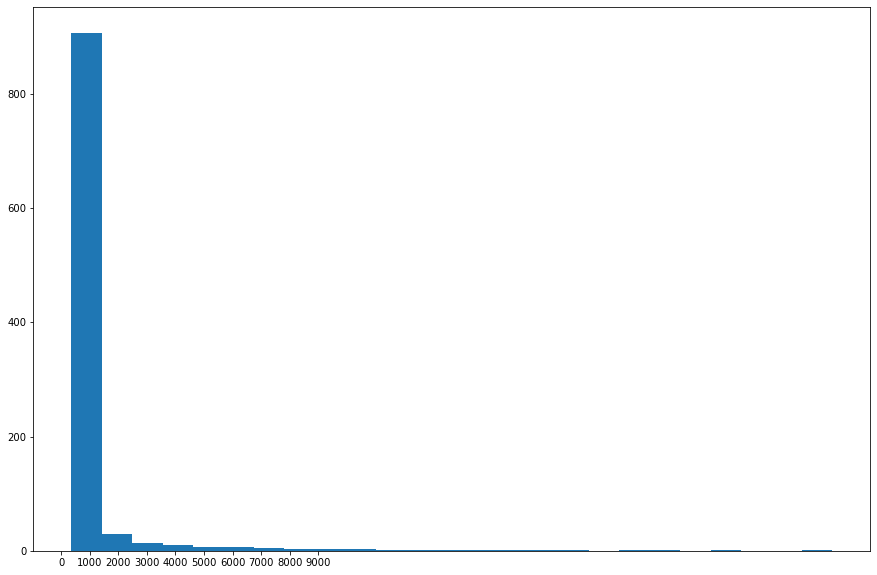

353

In [98]:
"""
Now let's look at the distribution of positive net_entry counts
Decided to generate my  own cumlative distribution data with parameters I can set.
I then plot with matplot lib to look at distribution of net_entries
We see that by far most of the net_entry counts are below 3000
"""
cum_count = []
for i in range(0, 10000, 10):
    cum_count.append(df[df.net_ent > i].count()[0])

print(cum_count)
# plt.figure(figsize = (20, 25), dpi = 60)
# sns.displot(cum_count, bins = 10)
# plt.show()

f, axs = plt.subplots(1,1, figsize = (15, 10))
plt.xticks(range(0, 10000, 1000))
axs.hist(cum_count, bins = 25)
plt.show()

df[df.net_ent > 7500].count()[0]

In [99]:
"""
Another way to analyze a cut-off for net_entry outliers:
If I assume that the maximum number of persons that can pass through a turnstile is one every two seconds,
this translates to 7200 per 4hr interval. 
Based on the histogram above and the anaysis of max persons through a turnstile, I believe 7500 is a 
reasonable and conservative cut-off for assuming that any number above 7500 is not credible and should 
be discarded. Similarly, and negative entries <7500 are not reasonable even if we assume the the negative is
a counter reversal errror.
"""


mask_outliers = ((df.net_ent < -7500)
        |(df.net_ent > 7500)
       )
df[mask_outliers]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
44,A043,R462,00-00-01,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,355512725,440753713,2019-11-23 00:00:00,5,Saturday,371510526.0,456280132.0,-15997801.0,-15526419.0
88,A043,R462,00-00-02,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,14129146,13480788,2019-11-23 00:00:00,5,Saturday,355520992.0,440766385.0,-341391846.0,-427285597.0
132,A043,R462,00-03-00,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,5483773,3874961,2019-11-23 00:00:00,5,Saturday,14140812.0,13492558.0,-8657039.0,-9617597.0
176,A043,R462,00-03-01,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,5177074,1760877,2019-11-23 00:00:00,5,Saturday,5490953.0,3880165.0,-313879.0,-2119288.0
220,A043,R462,00-03-02,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,4235165,1859578,2019-11-23 00:00:00,5,Saturday,5182463.0,1762833.0,-947298.0,96745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31439,R119,R320,00-00-01,CANAL ST,1,09/01/2019,04:00:00,REGULAR,9720458,3643957,2019-09-01 04:00:00,6,Sunday,1670296.0,671143.0,8050162.0,2972814.0
31481,R119,R320,00-00-02,CANAL ST,1,09/01/2019,04:00:00,REGULAR,419215,130560,2019-09-01 04:00:00,6,Sunday,9727711.0,3646871.0,-9308496.0,-3516311.0
31523,R120,R320,01-00-00,CANAL ST,1,09/01/2019,04:00:00,REGULAR,106478,346776,2019-09-01 04:00:00,6,Sunday,431849.0,134485.0,-325371.0,212291.0
31565,R120,R320,01-00-01,CANAL ST,1,09/01/2019,04:00:00,REGULAR,26019,60304,2019-09-01 04:00:00,6,Sunday,109679.0,357407.0,-83660.0,-297103.0


In [100]:
"""
Looking at outliers with various groupings in the next few cells
The problem is mostly time 00:00:00 mostly on Saturday as with in 2021

"""


df[mask_outliers].groupby('TIME').count()

,CA,UNIT,SCP,STATION,LINENAME,DATE,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
TIME,,,,,,,,,,,,,,,,
00:00:00,599,599,599,599,599,599,599,599,599,599,599,599,599,599,599,599
04:00:00,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112
08:00:00,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
12:00:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [101]:
df[mask_outliers].groupby(['day_name', 'TIME']).count()

CA  UNIT  SCP  STATION  LINENAME  DATE  DESC  ENTRIES  \
day_name TIME                                                               
Monday   12:00:00    1     1    1        1         1     1     1        1   
Saturday 00:00:00  599   599  599      599       599   599   599      599   
         04:00:00   57    57   57       57        57    57    57       57   
         08:00:00    3     3    3        3         3     3     3        3   
Sunday   04:00:00   55    55   55       55        55    55    55       55   

                   EXITS  date_time  day_num  prev_ent  prev_ex  net_ent  \
day_name TIME                                                              
Monday   12:00:00      1          1        1         1        1        1   
Saturday 00:00:00    599        599      599       599      599      599   
         04:00:00     57         57       57        57       57       57   
         08:00:00      3          3        3         3        3        3   
Sunday   04:00:00     55         55       55        55       55       55   

                   net_ex  
day_name TIME              
Monday   12:00:00       1  
Saturday 00:00:00     599  
         04:00:00      57  
         08:00:00       3  
Sunday   04:00:00      55

In [102]:
df[mask_outliers].groupby('LINENAME').count()

,CA,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
LINENAME,,,,,,,,,,,,,,,,
1,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
ACE,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247
JNQRZ6W,389,389,389,389,389,389,389,389,389,389,389,389,389,389,389,389


In [103]:
"""
dropping all rows with net_entry < -7500 or >7500
"""

df.drop(df[mask_outliers].index, inplace = True)


In [104]:
df[mask_outliers].count()

<ipython-input-104-93447ec5f762>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[mask_outliers].count()


CA           0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
date_time    0
day_num      0
day_name     0
prev_ent     0
prev_ex      0
net_ent      0
net_ex       0
dtype: int64

In [105]:
mask = ((df['day_name'] == 'Saturday')
       & (df['TIME'] == '00:00:00')
       )
df[mask]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
792,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,0,1177,2019-11-23,5,Saturday,4023.0,0.0,-4023.0,1177.0
836,A046,R463,00-05-02,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,949,0,2019-11-23,5,Saturday,0.0,1177.0,949.0,-1177.0
880,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,0,534,2019-11-23,5,Saturday,951.0,0.0,-951.0,534.0
3252,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/16/2019,00:00:00,REGULAR,0,1177,2019-11-16,5,Saturday,4017.0,0.0,-4017.0,1177.0
3294,A046,R463,00-05-02,CANAL ST,JNQRZ6W,11/16/2019,00:00:00,REGULAR,948,0,2019-11-16,5,Saturday,0.0,1177.0,948.0,-1177.0
3336,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/16/2019,00:00:00,REGULAR,0,531,2019-11-16,5,Saturday,949.0,0.0,-949.0,531.0
5685,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/09/2019,00:00:00,REGULAR,0,1177,2019-11-09,5,Saturday,4015.0,0.0,-4015.0,1177.0
5727,A046,R463,00-05-02,CANAL ST,JNQRZ6W,11/09/2019,00:00:00,REGULAR,944,0,2019-11-09,5,Saturday,0.0,1177.0,944.0,-1177.0
5769,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/09/2019,00:00:00,REGULAR,0,531,2019-11-09,5,Saturday,948.0,0.0,-948.0,531.0
8113,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/02/2019,00:00:00,REGULAR,0,1176,2019-11-02,5,Saturday,4010.0,0.0,-4010.0,1176.0


In [106]:
"""
Again checking for negative net_entry
Checking for how many negative entries and what percentage of all data and by line
Still 541 negative net entries, all from line JNQRZ6W
Negative net entries from the other lines where all outlier data
"""

all_neg = df[df.net_ent < 0]
print(f'all negative entries {all_neg.shape[0]}')
print(f'all entries {df.shape[0]}')
print(f'negs as percent of all entries {all_neg.shape[0] / df.shape[0] * 100}')
print('------------------------\n')

mask_allnegs_linej = ((df['LINENAME'] == 'JNQRZ6W') 
                       & (df["ENTRIES"] < df["prev_ent"])
                      )

all_linej = df[df['LINENAME'] == 'JNQRZ6W']
print(f'all negative entries Line JNQRZ6W {df[mask_allnegs_linej].shape[0]}')
print(f'all entries Line JNQRZ6W {all_linej.shape[0]}')
print(f'negs as percent of all entries Line JNQRZ6W  {df[mask_allnegs_linej].shape[0] / all_linej.shape[0] * 100}')
print('------------------------\n')




mask_allnegs_lineACE = ((df['LINENAME'] == 'ACE') 
                       & (df["ENTRIES"] < df["prev_ent"])
                      )


all_lineACE = df[df['LINENAME'] == 'ACE']
print(f'all negative entries Line ACE {df[mask_allnegs_lineACE].shape[0]}')
print(f'all entries Line ACE{all_lineACE.shape[0]}')
print(f'negs as percent of all entries Line ACE  {df[mask_allnegs_lineACE].shape[0] / all_lineACE.shape[0] * 100}')
print('------------------------\n')


mask_allnegs_line1 = ((df['LINENAME'] == '1') 
                       & (df["ENTRIES"] < df["prev_ent"])
                      )


all_line1 = df[df['LINENAME'] == '1']
print(f'all negative entries Line 1 {df[mask_allnegs_line1].shape[0]}')
print(f'all entries Line 1 {all_line1.shape[0]}')
print(f'negs as percent of all entries Line 1  {df[mask_allnegs_line1].shape[0] / all_line1.shape[0] * 100}')
print('------------------------\n')



all negative entries 547
all entries 30527
negs as percent of all entries 1.7918563894257542
------------------------

all negative entries Line JNQRZ6W 547
all entries Line JNQRZ6W 17374
negs as percent of all entries Line JNQRZ6W  3.148382640727524
------------------------

all negative entries Line ACE 0
all entries Line ACE10011
negs as percent of all entries Line ACE  0.0
------------------------

all negative entries Line 1 0
all entries Line 1 3142
negs as percent of all entries Line 1  0.0
------------------------



In [107]:
"""
Some of these negative net entries appear when there are 0 entries.
Let's take a closer look 
"""
all_neg.sort_values('net_ent')


,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
792,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,0,1177,2019-11-23 00:00:00,5,Saturday,4.023000e+03,0.000000e+00,-4023.0,1177.0
3252,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/16/2019,00:00:00,REGULAR,0,1177,2019-11-16 00:00:00,5,Saturday,4.017000e+03,0.000000e+00,-4017.0,1177.0
5685,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/09/2019,00:00:00,REGULAR,0,1177,2019-11-09 00:00:00,5,Saturday,4.015000e+03,0.000000e+00,-4015.0,1177.0
8113,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/02/2019,00:00:00,REGULAR,0,1176,2019-11-02 00:00:00,5,Saturday,4.010000e+03,0.000000e+00,-4010.0,1176.0
10558,A046,R463,00-05-01,CANAL ST,JNQRZ6W,10/26/2019,00:00:00,REGULAR,0,1175,2019-10-26 00:00:00,5,Saturday,4.000000e+03,0.000000e+00,-4000.0,1175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20786,A066,R118,00-00-00,CANAL ST,JNQRZ6W,10/02/2019,04:00:00,REGULAR,1723463908,1763212074,2019-10-02 04:00:00,2,Wednesday,1.723464e+09,1.763212e+09,-16.0,16.0
13505,A066,R118,00-00-00,CANAL ST,JNQRZ6W,10/22/2019,04:00:00,REGULAR,1723393182,1763241618,2019-10-22 04:00:00,1,Tuesday,1.723393e+09,1.763242e+09,-16.0,25.0
13517,A066,R118,00-00-00,CANAL ST,JNQRZ6W,10/24/2019,04:00:00,REGULAR,1723385794,1763244033,2019-10-24 04:00:00,3,Thursday,1.723386e+09,1.763244e+09,-15.0,27.0
13499,A066,R118,00-00-00,CANAL ST,JNQRZ6W,10/21/2019,04:00:00,REGULAR,1723397040,1763240511,2019-10-21 04:00:00,0,Monday,1.723397e+09,1.763240e+09,-12.0,20.0


In [108]:
"""
All 0 entries are from the same CA -UNIT and two SCPs at time 00:00:00 over multiple Saturdays
So clearly some sort of malfunction.
Let's drop these from the dataframe.
"""

all_neg[all_neg.ENTRIES == 0]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
792,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,0,1177,2019-11-23 00:00:00,5,Saturday,4023.0,0.0,-4023.0,1177.0
880,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/23/2019,00:00:00,REGULAR,0,534,2019-11-23 00:00:00,5,Saturday,951.0,0.0,-951.0,534.0
3252,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/16/2019,00:00:00,REGULAR,0,1177,2019-11-16 00:00:00,5,Saturday,4017.0,0.0,-4017.0,1177.0
3336,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/16/2019,00:00:00,REGULAR,0,531,2019-11-16 00:00:00,5,Saturday,949.0,0.0,-949.0,531.0
5685,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/09/2019,00:00:00,REGULAR,0,1177,2019-11-09 00:00:00,5,Saturday,4015.0,0.0,-4015.0,1177.0
5769,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/09/2019,00:00:00,REGULAR,0,531,2019-11-09 00:00:00,5,Saturday,948.0,0.0,-948.0,531.0
8113,A046,R463,00-05-01,CANAL ST,JNQRZ6W,11/02/2019,00:00:00,REGULAR,0,1176,2019-11-02 00:00:00,5,Saturday,4010.0,0.0,-4010.0,1176.0
8197,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/02/2019,00:00:00,REGULAR,0,530,2019-11-02 00:00:00,5,Saturday,944.0,0.0,-944.0,530.0
10558,A046,R463,00-05-01,CANAL ST,JNQRZ6W,10/26/2019,00:00:00,REGULAR,0,1175,2019-10-26 00:00:00,5,Saturday,4000.0,0.0,-4000.0,1175.0
10640,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/26/2019,00:00:00,REGULAR,0,530,2019-10-26 00:00:00,5,Saturday,942.0,0.0,-942.0,530.0


In [109]:
"""
dropping all 0 entry rows as per explanation in cell above
"""


mask = ((df.LINENAME == 'JNQRZ6W')
        &(df.CA == 'A046')
        &(df.UNIT == 'R463')
        &((df.SCP == '00-05-01') | (df.SCP == '00-05-03'))
        &(df.ENTRIES == 0)
        &(df.TIME == '00:00:00')
        &(df.net_ent < 0)
        
       )
df.drop(df[mask].index, inplace = True)

In [110]:
"""
recalc all_neg and examine.
All remaining negative net entries are from the same CA -UNIT- SCP unit
"""
all_neg = df[df.net_ent < 0]
all_neg.groupby(['CA','UNIT','SCP','LINENAME']).count()


STATION  DATE  TIME  DESC  ENTRIES  EXITS  \
CA   UNIT SCP      LINENAME                                              
A046 R463 00-05-01 JNQRZ6W         1     1     1     1        1      1   
          00-05-03 JNQRZ6W         1     1     1     1        1      1   
A066 R118 00-00-00 JNQRZ6W       521   521   521   521      521    521   

                             date_time  day_num  day_name  prev_ent  prev_ex  \
CA   UNIT SCP      LINENAME                                                    
A046 R463 00-05-01 JNQRZ6W           1        1         1         1        1   
          00-05-03 JNQRZ6W           1        1         1         1        1   
A066 R118 00-00-00 JNQRZ6W         521      521       521       521      521   

                             net_ent  net_ex  
CA   UNIT SCP      LINENAME                   
A046 R463 00-05-01 JNQRZ6W         1       1  
          00-05-03 JNQRZ6W         1       1  
A066 R118 00-00-00 JNQRZ6W       521     521

In [111]:
"""
Examining the remaining negative entries, by count and summation, the data is spread over a number of days
and time intervals. Other than being negative, the numbers look reasonable
"""

all_neg.groupby(['CA','UNIT','SCP','LINENAME','date_time']).count().sort_values('net_ent')
# all_neg.groupby(['CA','UNIT','SCP','LINENAME','date_time']).sum().sort_values('net_ent')

STATION  DATE  TIME  DESC  \
CA   UNIT SCP      LINENAME date_time                                        
A046 R463 00-05-01 JNQRZ6W  2019-09-01 04:00:00        1     1     1     1   
A066 R118 00-00-00 JNQRZ6W  2019-11-01 04:00:00        1     1     1     1   
                            2019-11-01 00:00:00        1     1     1     1   
                            2019-10-31 20:00:00        1     1     1     1   
                            2019-10-31 16:00:00        1     1     1     1   
...                                                  ...   ...   ...   ...   
                            2019-09-30 00:00:00        1     1     1     1   
                            2019-09-29 20:00:00        1     1     1     1   
                            2019-09-29 16:00:00        1     1     1     1   
                            2019-09-29 08:00:00        1     1     1     1   
                            2019-11-29 20:00:00        1     1     1     1   

                                                 ENTRIES  EXITS  day_num  \
CA   UNIT SCP      LINENAME date_time                                      
A046 R463 00-05-01 JNQRZ6W  2019-09-01 04:00:00        1      1        1   
A066 R118 00-00-00 JNQRZ6W  2019-11-01 04:00:00        1      1        1   
                            2019-11-01 00:00:00        1      1        1   
                            2019-10-31 20:00:00        1      1        1   
                            2019-10-31 16:00:00        1      1        1   
...                                                  ...    ...      ...   
                            2019-09-30 00:00:00        1      1        1   
                            2019-09-29 20:00:00        1      1        1   
                            2019-09-29 16:00:00        1      1        1   
                            2019-09-29 08:00:00        1      1        1   
                            2019-11-29 20:00:00        1      1        1   

                                                 day_name  prev_ent  prev_ex  \
CA   UNIT SCP      LINENAME date_time                                          
A046 R463 00-05-01 JNQRZ6W  2019-09-01 04:00:00         1         1        1   
A066 R118 00-00-00 JNQRZ6W  2019-11-01 04:00:00         1         1        1   
                            2019-11-01 00:00:00         1         1        1   
                            2019-10-31 20:00:00         1         1        1   
                            2019-10-31 16:00:00         1         1        1   
...                                                   ...       ...      ...   
                            2019-09-30 00:00:00         1         1        1   
                            2019-09-29 20:00:00         1         1        1   
                            2019-09-29 16:00:00         1         1        1   
                            2019-09-29 08:00:00         1         1        1   
                            2019-11-29 20:00:00         1         1        1   

                                                 net_ent  net_ex  
CA   UNIT SCP      LINENAME date_time                             
A046 R463 00-05-01 JNQRZ6W  2019-09-01 04:00:00        1       1  
A066 R118 00-00-00 JNQRZ6W  2019-11-01 04:00:00        1       1  
                            2019-11-01 00:00:00        1       1  
                            2019-10-31 20:00:00        1       1  
                            2019-10-31 16:00:00        1       1  
...                                                  ...     ...  
                            2019-09-30 00:00:00        1       1  
                            2019-09-29 20:00:00        1       1  
                            2019-09-29 16:00:00        1       1  
                            2019-09-29 08:00:00        1       1  
                            2019-11-29 20:00:00        1       1  

[523 rows x 12 columns]

In [112]:
"""
Based on the examinations above and the stats here, other than being negative, the net entry
numbers look reasonable. I am going to assume that these negative entries are a result of counter reversal
and will change the net entry value to positive
"""

all_neg.describe()

,ENTRIES,EXITS,day_num,prev_ent,prev_ex,net_ent,net_ex
count,5.230000e+02,5.230000e+02,523.000000,5.230000e+02,5.230000e+02,523.000000,523.000000
mean,1.716825e+09,1.756487e+09,2.923518,1.716825e+09,1.756487e+09,-601.311663,225.910134
std,1.064726e+08,1.089323e+08,2.003321,1.064725e+08,1.089323e+08,578.139595,200.519740
min,0.000000e+00,5.280000e+02,0.000000,9.200000e+02,0.000000e+00,-3953.000000,6.000000
25%,1.723330e+09,1.763203e+09,1.000000,1.723332e+09,1.763203e+09,-1035.500000,110.500000
50%,1.723414e+09,1.763229e+09,3.000000,1.723414e+09,1.763229e+09,-429.000000,226.000000
75%,1.723494e+09,1.763261e+09,5.000000,1.723494e+09,1.763261e+09,-79.000000,301.000000
max,1.723577e+09,1.763286e+09,6.000000,1.723577e+09,1.763285e+09,-9.000000,1859.000000


In [113]:
"""
Based on analysis in cells above, converting all remaining negative net entries to positive value
"""

df['net_ent'] = np.where(df['net_ent'] < 0,df['net_ent']*-1 ,df['net_ent'])


In [114]:
"""
Check for negative net entries again. 
None remain...hurrah!

"""
df[df.net_ent < 0].count()

CA           0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
date_time    0
day_num      0
day_name     0
prev_ent     0
prev_ex      0
net_ent      0
net_ex       0
dtype: int64

In [115]:
"""
Performing same analysis as above for net_exits.
this data looks anamolous
"""

df[df.net_ex < 0].shape
df[df.net_ex < 0].groupby(['CA','UNIT','SCP','LINENAME','TIME','date_time']).sum().sort_values('net_ex')

ENTRIES  EXITS  \
CA   UNIT SCP      LINENAME TIME     date_time                             
A046 R463 00-05-02 JNQRZ6W  00:00:00 2019-11-02 00:00:00      942      0   
                                     2019-11-09 00:00:00      944      0   
                                     2019-11-16 00:00:00      948      0   
                                     2019-11-23 00:00:00      949      0   
                                     2019-10-26 00:00:00      938      0   
                                     2019-10-19 00:00:00      936      0   
                                     2019-10-12 00:00:00      934      0   
                                     2019-10-05 00:00:00      929      0   
                                     2019-09-21 00:00:00      927      0   
                                     2019-09-28 00:00:00      928      0   
                                     2019-09-14 00:00:00      924      0   
                                     2019-09-07 00:00:00      920      0   
                            04:00:00 2019-09-01 04:00:00      918      0   

                                                          day_num  prev_ent  \
CA   UNIT SCP      LINENAME TIME     date_time                                
A046 R463 00-05-02 JNQRZ6W  00:00:00 2019-11-02 00:00:00        5       0.0   
                                     2019-11-09 00:00:00        5       0.0   
                                     2019-11-16 00:00:00        5       0.0   
                                     2019-11-23 00:00:00        5       0.0   
                                     2019-10-26 00:00:00        5       0.0   
                                     2019-10-19 00:00:00        5       0.0   
                                     2019-10-12 00:00:00        5       0.0   
                                     2019-10-05 00:00:00        5       0.0   
                                     2019-09-21 00:00:00        5       0.0   
                                     2019-09-28 00:00:00        5       0.0   
                                     2019-09-14 00:00:00        5       0.0   
                                     2019-09-07 00:00:00        5       0.0   
                            04:00:00 2019-09-01 04:00:00        6       0.0   

                                                          prev_ex  net_ent  \
CA   UNIT SCP      LINENAME TIME     date_time                               
A046 R463 00-05-02 JNQRZ6W  00:00:00 2019-11-02 00:00:00   1177.0    942.0   
                                     2019-11-09 00:00:00   1177.0    944.0   
                                     2019-11-16 00:00:00   1177.0    948.0   
                                     2019-11-23 00:00:00   1177.0    949.0   
                                     2019-10-26 00:00:00   1176.0    938.0   
                                     2019-10-19 00:00:00   1175.0    936.0   
                                     2019-10-12 00:00:00   1172.0    934.0   
                                     2019-10-05 00:00:00   1171.0    929.0   
                                     2019-09-21 00:00:00   1168.0    927.0   
                                     2019-09-28 00:00:00   1168.0    928.0   
                                     2019-09-14 00:00:00   1162.0    924.0   
                                     2019-09-07 00:00:00   1160.0    920.0   
                            04:00:00 2019-09-01 04:00:00   1159.0    918.0   

                                                          net_ex  
CA   UNIT SCP      LINENAME TIME     date_time                    
A046 R463 00-05-02 JNQRZ6W  00:00:00 2019-11-02 00:00:00 -1177.0  
                                     2019-11-09 00:00:00 -1177.0  
                                     2019-11-16 00:00:00 -1177.0  
                                     2019-11-23 00:00:00 -1177.0  
                                     2019-10-26 00:00:00 -1176.0  
                                     2019-10-19 00:00:00 -1175.0  
                        

In [116]:
"""
dropping all neagtive entry rows as per explanation in cell above
"""


mask = ((df.LINENAME == 'JNQRZ6W')
        &(df.CA == 'A046')
        &(df.UNIT == 'R463')
        &(df.SCP == '00-05-02')
        &(df.EXITS == 0)
        &(df.TIME == '00:00:00')
        &(df.net_ex < 0)
        
       )
df.drop(df[mask].index, inplace = True)

In [117]:
"""
Just a look to see if there are any net exit anomalies.
There are none.
"""


df[df.net_ex > 7500].count()[0]
df[df.net_ex < -7500].count()[0]

0

In [118]:
"""
Now I'm checking for days when then there were 0 entries with summation and count.
All zero entries are from the same line name and CA -UNIT and two  SCPs, spread over weeks and
all time intervals. Net entries and exits are zero. A reasonable assumption is that this turnstile(s)
where blocked or closed off and not being used. The net entries are zero confirming a closure of some sort.

So these rows should be dropped
"""

zero_ent = df[df.ENTRIES == 0]

# zero_ent.groupby(['CA','UNIT','SCP','LINENAME','date_time']).count()
zero_ent.groupby(['CA','UNIT','SCP','LINENAME','date_time']).sum().sort_values('net_ent')



ENTRIES  EXITS  day_num  \
CA   UNIT SCP      LINENAME date_time                                      
A046 R463 00-05-03 JNQRZ6W  2019-09-01 16:00:00        0    528        6   
                            2019-09-30 00:00:00        0    529        0   
                            2019-09-30 04:00:00        0    529        0   
                            2019-09-30 08:00:00        0    529        0   
                            2019-09-30 12:00:00        0    529        0   
...                                                  ...    ...      ...   
          00-05-01 JNQRZ6W  2019-10-31 04:00:00        0   1176        3   
                            2019-10-31 00:00:00        0   1176        3   
                            2019-11-01 00:00:00        0   1176        4   
          00-05-03 JNQRZ6W  2019-09-01 04:00:00        0    528        6   
          00-05-01 JNQRZ6W  2019-09-01 04:00:00        0   1159        6   

                                                 prev_ent  prev_ex  net_ent  \
CA   UNIT SCP      LINENAME date_time                                         
A046 R463 00-05-03 JNQRZ6W  2019-09-01 16:00:00       0.0    528.0      0.0   
                            2019-09-30 00:00:00       0.0    529.0      0.0   
                            2019-09-30 04:00:00       0.0    529.0      0.0   
                            2019-09-30 08:00:00       0.0    529.0      0.0   
                            2019-09-30 12:00:00       0.0    529.0      0.0   
...                                                   ...      ...      ...   
          00-05-01 JNQRZ6W  2019-10-31 04:00:00       0.0   1176.0      0.0   
                            2019-10-31 00:00:00       0.0   1176.0      0.0   
                            2019-11-01 00:00:00       0.0   1176.0      0.0   
          00-05-03 JNQRZ6W  2019-09-01 04:00:00     920.0      0.0    920.0   
          00-05-01 JNQRZ6W  2019-09-01 04:00:00    3953.0      0.0   3953.0   

                                                 net_ex  
CA   UNIT SCP      LINENAME date_time                    
A046 R463 00-05-03 JNQRZ6W  2019-09-01 16:00:00     0.0  
                            2019-09-30 00:00:00     0.0  
                            2019-09-30 04:00:00     0.0  
                            2019-09-30 08:00:00     0.0  
                            2019-09-30 12:00:00     0.0  
...                                                 ...  
          00-05-01 JNQRZ6W  2019-10-31 04:00:00     0.0  
                            2019-10-31 00:00:00     0.0  
                            2019-11-01 00:00:00     0.0  
          00-05-03 JNQRZ6W  2019-09-01 04:00:00   528.0  
          00-05-01 JNQRZ6W  2019-09-01 04:00:00  1159.0  

[1045 rows x 7 columns]

In [119]:
"""
Dropping zero entry rows as per analysis above
"""

df.drop(df[df.ENTRIES == 0].index, inplace = True)

In [120]:
"""
Performing the same analysis as above for days with 0 exits.
It again appears all 0 exits are associated with the JNQRZ6W and the same R463 unit
Almost zero net entries or exits

drop these rows
"""

zero_exit = df[df.EXITS == 0]
zero_exit.groupby(['CA','UNIT','SCP','LINENAME','date_time']).count()
zero_exit.groupby(['CA','UNIT','SCP','LINENAME','date_time']).sum()




ENTRIES  EXITS  day_num  \
CA   UNIT SCP      LINENAME date_time                                      
A046 R463 00-05-00 JNQRZ6W  2019-09-01 08:00:00     3948      0        6   
                            2019-09-01 12:00:00     3948      0        6   
                            2019-09-01 16:00:00     3948      0        6   
                            2019-09-01 20:00:00     3948      0        6   
                            2019-09-02 00:00:00     3948      0        0   
...                                                  ...    ...      ...   
          00-05-02 JNQRZ6W  2019-11-29 04:00:00      951      0        4   
                            2019-11-29 08:00:00      951      0        4   
                            2019-11-29 12:00:00      951      0        4   
                            2019-11-29 16:00:00      951      0        4   
                            2019-11-29 20:00:00      951      0        4   

                                                 prev_ent  prev_ex  net_ent  \
CA   UNIT SCP      LINENAME date_time                                         
A046 R463 00-05-00 JNQRZ6W  2019-09-01 08:00:00    3948.0      0.0      0.0   
                            2019-09-01 12:00:00    3948.0      0.0      0.0   
                            2019-09-01 16:00:00    3948.0      0.0      0.0   
                            2019-09-01 20:00:00    3948.0      0.0      0.0   
                            2019-09-02 00:00:00    3948.0      0.0      0.0   
...                                                   ...      ...      ...   
          00-05-02 JNQRZ6W  2019-11-29 04:00:00     951.0      0.0      0.0   
                            2019-11-29 08:00:00     951.0      0.0      0.0   
                            2019-11-29 12:00:00     951.0      0.0      0.0   
                            2019-11-29 16:00:00     951.0      0.0      0.0   
                            2019-11-29 20:00:00     951.0      0.0      0.0   

                                                 net_ex  
CA   UNIT SCP      LINENAME date_time                    
A046 R463 00-05-00 JNQRZ6W  2019-09-01 08:00:00     0.0  
                            2019-09-01 12:00:00     0.0  
                            2019-09-01 16:00:00     0.0  
                            2019-09-01 20:00:00     0.0  
                            2019-09-02 00:00:00     0.0  
...                                                 ...  
          00-05-02 JNQRZ6W  2019-11-29 04:00:00     0.0  
                            2019-11-29 08:00:00     0.0  
                            2019-11-29 12:00:00     0.0  
                            2019-11-29 16:00:00     0.0  
                            2019-11-29 20:00:00     0.0  

[1053 rows x 7 columns]

In [121]:
"""
Drop zero exit rows as per above analysis
"""

df.drop(df[df.EXITS == 0].index, inplace = True)

In [122]:
"""
Just a check to make sure all zero entries and exits have been dropped

"""

print(df[df.EXITS == 0], df[df.ENTRIES == 0])

Empty DataFrame
Columns: [CA, UNIT, SCP, STATION, LINENAME, DATE, TIME, DESC, ENTRIES, EXITS, date_time, day_num, day_name, prev_ent, prev_ex, net_ent, net_ex]
Index: [] Empty DataFrame
Columns: [CA, UNIT, SCP, STATION, LINENAME, DATE, TIME, DESC, ENTRIES, EXITS, date_time, day_num, day_name, prev_ent, prev_ex, net_ent, net_ex]
Index: []


In [123]:
""" 
Add columns:
> calculate net_entry + net_exit. This is a good proxy for total traffic around the station
> calculate net_entry - net_exit. This is an indication of traffic direction and perhaps a hint at demographics
"""

df['n_ent + n_ex'] = df.net_ent + df.net_ex
df['n_ent - n_ex'] = df.net_ent - df.net_ex

# df['day_num'] = df['date_time'].dt.dayofweek
# df['day_name'] = df['date_time'].dt.day_name()


df

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex,n_ent + n_ex,n_ent - n_ex
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,04:00:00,REGULAR,371502912,456269210,2019-11-23 04:00:00,5,Saturday,371502903.0,456269207.0,9.0,3.0,12.0,6.0
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,08:00:00,REGULAR,371502916,456269234,2019-11-23 08:00:00,5,Saturday,371502912.0,456269210.0,4.0,24.0,28.0,-20.0
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,12:00:00,REGULAR,371502950,456269368,2019-11-23 12:00:00,5,Saturday,371502916.0,456269234.0,34.0,134.0,168.0,-100.0
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,16:00:00,REGULAR,371503116,456269537,2019-11-23 16:00:00,5,Saturday,371502950.0,456269368.0,166.0,169.0,335.0,-3.0
5,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/23/2019,20:00:00,REGULAR,371503392,456269637,2019-11-23 20:00:00,5,Saturday,371503116.0,456269537.0,276.0,100.0,376.0,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31637,R120,R320,01-00-02,CANAL ST,1,09/06/2019,04:00:00,REGULAR,1421028,8068916,2019-09-06 04:00:00,4,Friday,1421028.0,8068911.0,0.0,5.0,5.0,-5.0
31638,R120,R320,01-00-02,CANAL ST,1,09/06/2019,08:00:00,REGULAR,1421049,8069278,2019-09-06 08:00:00,4,Friday,1421028.0,8068916.0,21.0,362.0,383.0,-341.0
31639,R120,R320,01-00-02,CANAL ST,1,09/06/2019,12:00:00,REGULAR,1421096,8069769,2019-09-06 12:00:00,4,Friday,1421049.0,8069278.0,47.0,491.0,538.0,-444.0
31640,R120,R320,01-00-02,CANAL ST,1,09/06/2019,16:00:00,REGULAR,1421248,8070022,2019-09-06 16:00:00,4,Friday,1421096.0,8069769.0,152.0,253.0,405.0,-101.0


In [124]:

"""
Based on some of the analysis above, I noticed that unique combinations of turnstile identifyers CA, UNIT,
SCP are associated with a single line name. The code below confirms that this is the case. I loop over the 
dataframe, isolating each line name at this station, then generate a string combination of CA, UNIT,
SCP for each row and store that in a set for that line name. 

I end up with a set, for each line name of unique combinations of CA, UNIT, and SCP. I then check for 
intersections  between these sets which are empty. so this tells me that I can isolate traffic data by line
name and time interval. When I look at a NYC subway map, the line names cleary match up to different entrances
of the Canal st. complex. So this allows me to analyze data based on time intervals as small as 4 hours
by enterance/line. This is a very good start at micro targeting advertising.
"""



stiles_id_ace = set()
stiles_id_j = set()
stiles_id_1 = set()

for row in df.itertuples(index = True):
    if (row.LINENAME == 'ACE'):
        stiles_id_ace.add(getattr(row, "CA") +  getattr(row, "UNIT") + getattr(row, "SCP") )
print(stiles_id_ace)
print('-'*30 + '\n')

for row in df.itertuples(index = True):
    if (row.LINENAME == 'JNQRZ6W'):
        stiles_id_j.add(getattr(row, "CA") +  getattr(row, "UNIT") + getattr(row, "SCP") )
print(stiles_id_j)
print('-'*30 + '\n')

for row in df.itertuples(index = True):
    if (row.LINENAME == '1'):
        stiles_id_1.add(getattr(row, "CA") +  getattr(row, "UNIT") + getattr(row, "SCP") )
print(stiles_id_1)
print('-'*30 + '\n')


print(stiles_id_ace.intersection(stiles_id_j))
print(stiles_id_ace.intersection(stiles_id_1))
print(stiles_id_j.intersection(stiles_id_1))


{'N090R13901-00-02', 'N089R13900-00-01', 'N090R13901-05-00', 'N089R13900-03-02', 'N089R13900-06-00', 'N090R13901-00-00', 'N089R13900-00-02', 'N090R13901-00-01', 'N090R13901-03-00', 'N089R13900-00-00', 'N089R13900-06-01', 'N089R13900-06-02', 'N089R13900-04-01', 'N089R13900-04-02', 'N089R13900-04-00', 'N090R13901-06-01', 'N089R13900-03-00', 'N090R13901-06-00', 'N089R13900-03-01'}
------------------------------

{'A066R11800-00-00', 'A046R46300-06-02', 'A043R46200-03-04', 'A046R46300-00-03', 'A043R46200-03-03', 'A043R46200-00-00', 'A046R46300-00-01', 'A046R46300-06-03', 'A046R46300-06-07', 'A043R46200-06-01', 'A043R46200-06-00', 'A046R46300-06-04', 'A043R46200-03-01', 'A043R46200-00-01', 'A043R46200-03-00', 'A043R46200-06-02', 'A046R46300-03-01', 'A046R46300-06-01', 'A046R46300-06-05', 'A046R46300-00-02', 'A043R46200-03-02', 'A043R46200-00-02', 'A066R11800-00-01', 'A046R46300-06-06', 'A046R46300-06-00', 'A046R46300-00-00', 'A046R46300-03-00', 'A046R46300-06-08', 'A066R11800-00-02'}
------

In [125]:
df.groupby(['LINENAME', 'DATE', 'TIME']).agg({'net_ent':'sum', 'net_ex':'sum','n_ent + n_ex': 'sum'})

net_ent   net_ex  n_ent + n_ex
LINENAME DATE       TIME                                    
1        09/01/2019 08:00:00     60.0     89.0         149.0
                    12:00:00    353.0    726.0        1079.0
                    16:00:00    661.0   1018.0        1679.0
                    20:00:00    795.0    727.0        1522.0
         09/02/2019 00:00:00    292.0    208.0         500.0
...                               ...      ...           ...
JNQRZ6W  11/29/2019 04:00:00    271.0    291.0         562.0
                    08:00:00    458.0   1494.0        1952.0
                    12:00:00   3835.0   8679.0       12514.0
                    16:00:00  13082.0  11244.0       24326.0
                    20:00:00  16853.0   7520.0       24373.0

[1552 rows x 3 columns]

In [126]:
"""
Next few cells are just exploratory plots

"""


mask = ((df['LINENAME'] == 'ACE') &
        ((df['DATE'] == '10/01/2019')) 
       )
df[mask]

df_ace = (df[mask])

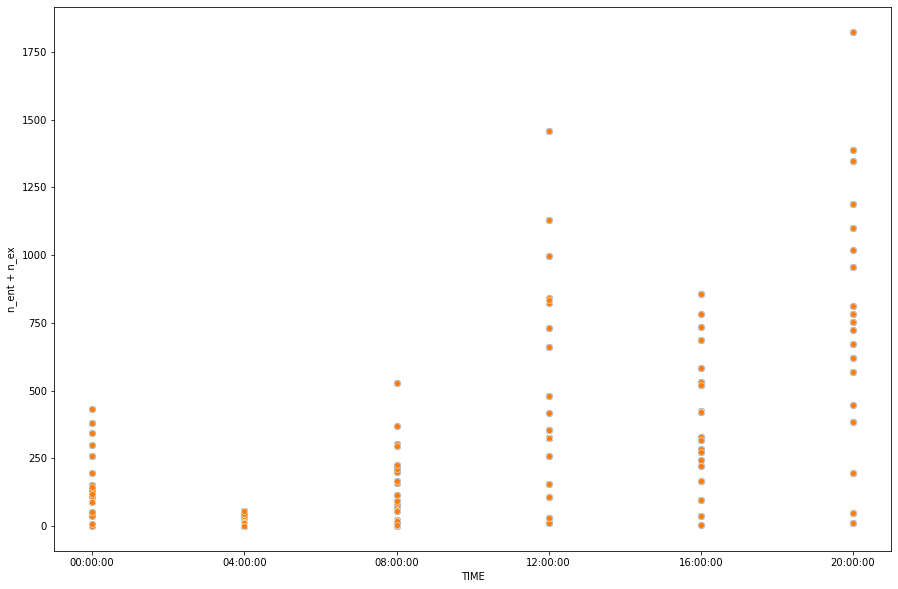

In [127]:
f, axs = plt.subplots(1,1, figsize = (15, 10))
axs.scatter(df_ace.TIME, df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace, x = "TIME", y= df_ace["n_ent + n_ex"])
plt.show()


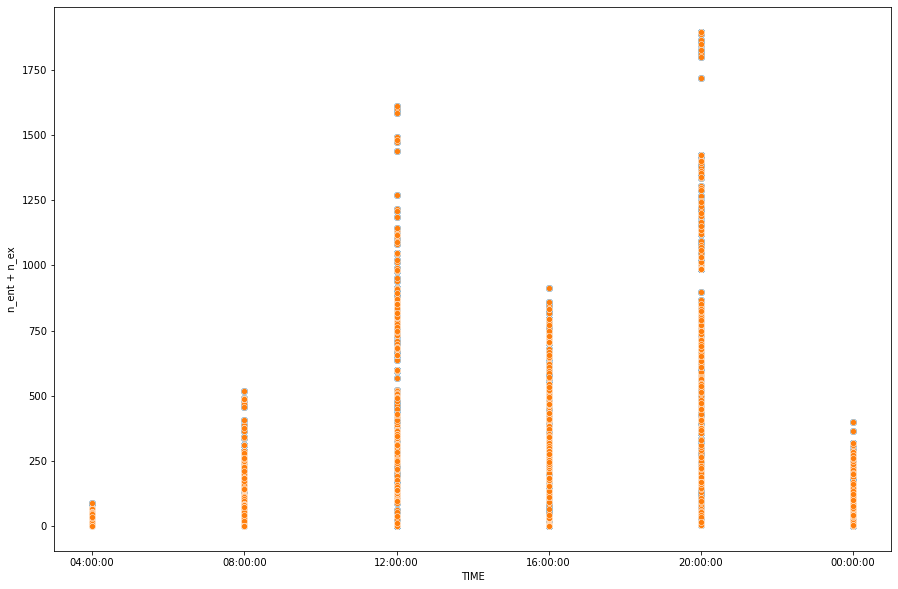

In [128]:
mask2 = ((df['LINENAME'] == 'ACE') &
        ((df['day_name'] == 'Monday')) 
       )
df[mask2]

df_ace2 = (df[mask2])


f, axs = plt.subplots(1,1, figsize = (15, 10))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
plt.show()

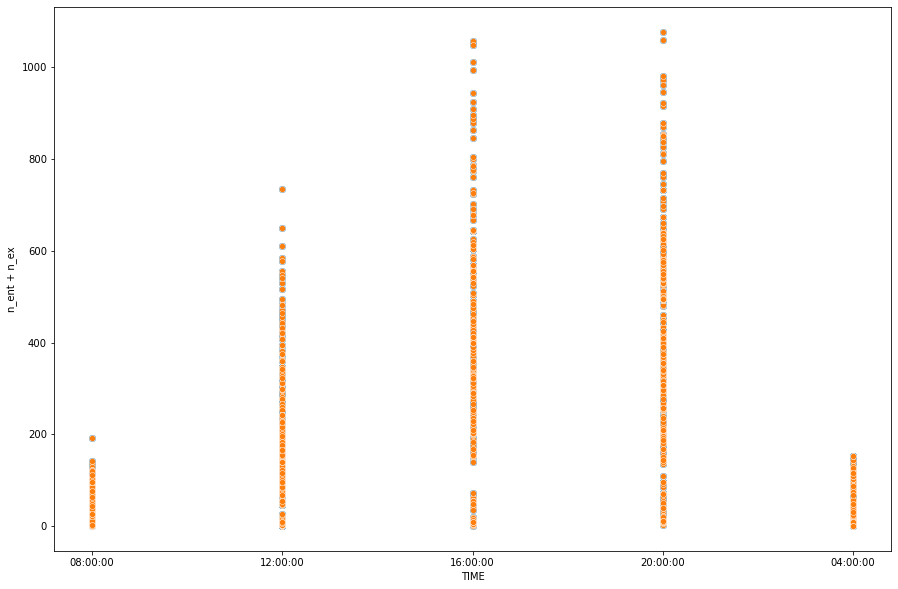

In [129]:
mask2 = ((df['LINENAME'] == 'ACE') &
        ((df['day_name'] == 'Saturday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
# plt.xticks(range(0, 10000, 500))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
# axs.hist(df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
# axs =sns.pairplot(df_ace)
plt.show()

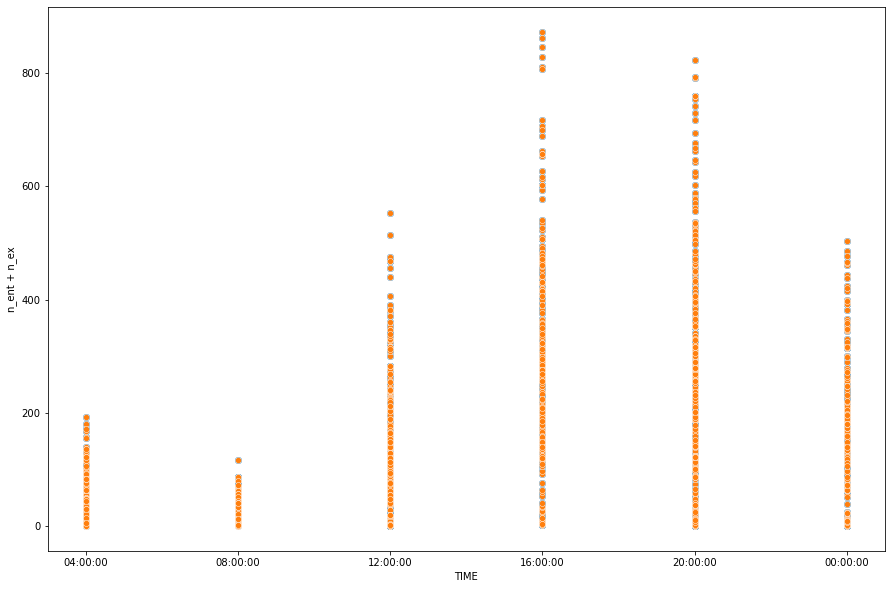

In [130]:
mask2 = ((df['LINENAME'] == 'ACE') &
        ((df['day_name'] == 'Sunday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
# plt.xticks(range(0, 10000, 500))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
# axs.hist(df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
# axs =sns.pairplot(df_ace)
plt.show()

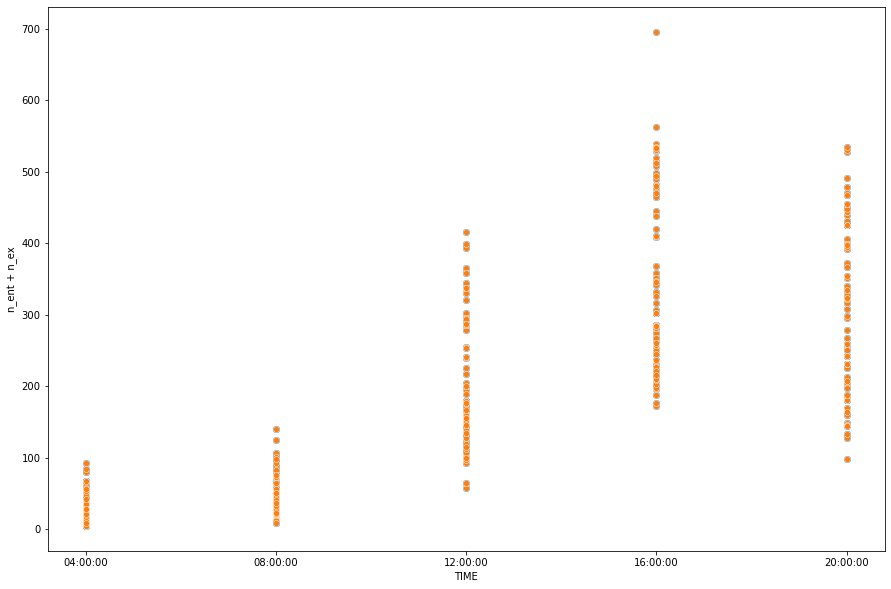

In [131]:
mask2 = ((df['LINENAME'] == '1') &
        ((df['day_name'] == 'Saturday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
plt.show()

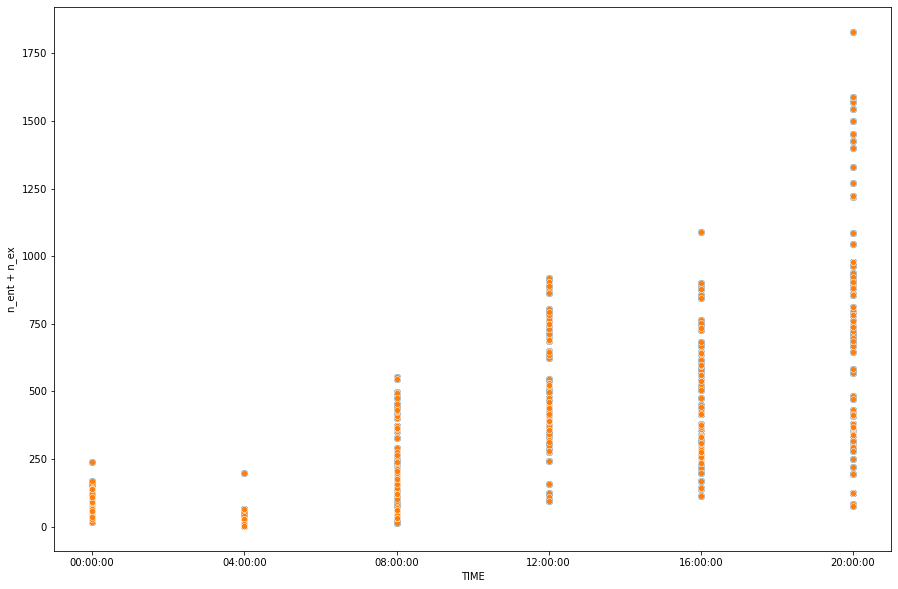

In [132]:
mask2 = ((df['LINENAME'] == '1') &
        ((df['day_name'] == 'Monday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
# plt.xticks(range(0, 10000, 500))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
# axs.hist(df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
# axs =sns.pairplot(df_ace)
plt.show()

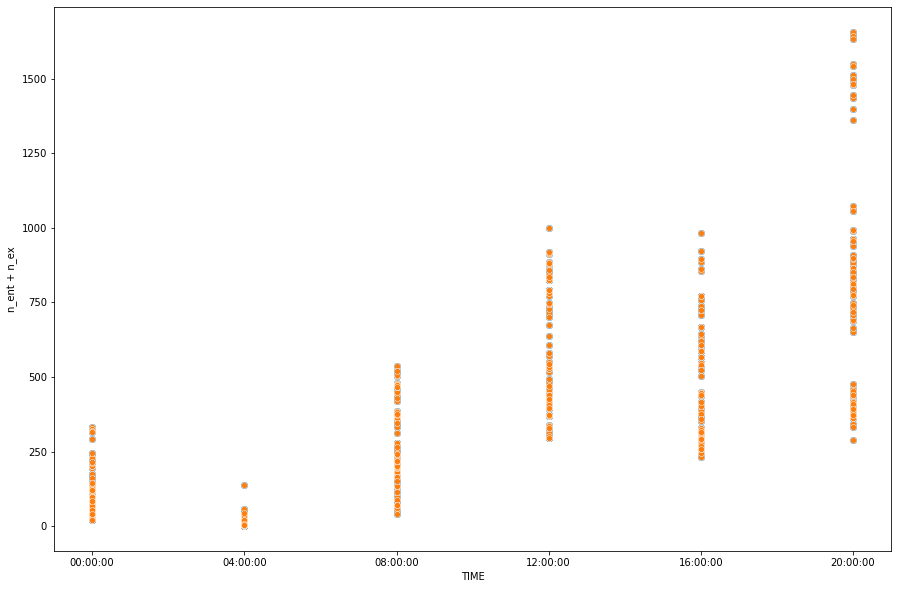

In [133]:
mask2 = ((df['LINENAME'] == '1') &
        ((df['day_name'] == 'Tuesday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
# plt.xticks(range(0, 10000, 500))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
# axs.hist(df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
# axs =sns.pairplot(df_ace)
plt.show()

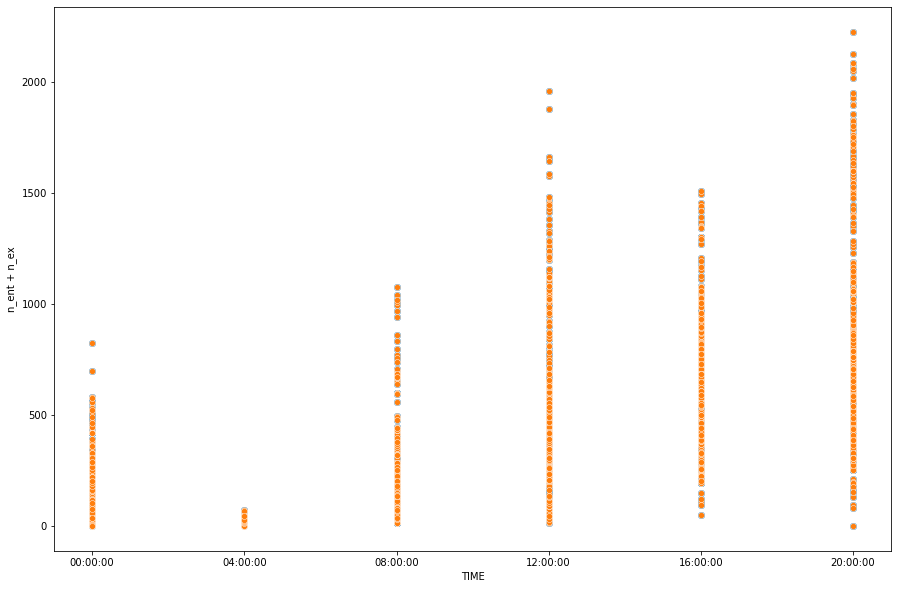

In [134]:
mask2 = ((df['LINENAME'] == 'JNQRZ6W') &
        ((df['day_name'] == 'Monday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
# plt.xticks(range(0, 10000, 500))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
# axs.hist(df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
# axs =sns.pairplot(df_ace)
plt.show()

In [135]:
"""
Creating final grouping into a new frame for export

"""

df_clean = df.groupby(['LINENAME','date_time', 'day_name', 'TIME']).agg({'net_ent':'sum',
                                                            'net_ex':'sum',
                                                            'n_ent + n_ex': 'sum'}).reset_index()
df_clean

,LINENAME,date_time,day_name,TIME,net_ent,net_ex,n_ent + n_ex
0,1,2019-09-01 08:00:00,Sunday,08:00:00,60.0,89.0,149.0
1,1,2019-09-01 12:00:00,Sunday,12:00:00,353.0,726.0,1079.0
2,1,2019-09-01 16:00:00,Sunday,16:00:00,661.0,1018.0,1679.0
3,1,2019-09-01 20:00:00,Sunday,20:00:00,795.0,727.0,1522.0
4,1,2019-09-02 00:00:00,Monday,00:00:00,292.0,208.0,500.0
...,...,...,...,...,...,...,...
1547,JNQRZ6W,2019-11-29 04:00:00,Friday,04:00:00,271.0,291.0,562.0
1548,JNQRZ6W,2019-11-29 08:00:00,Friday,08:00:00,458.0,1494.0,1952.0
1549,JNQRZ6W,2019-11-29 12:00:00,Friday,12:00:00,3835.0,8679.0,12514.0
1550,JNQRZ6W,2019-11-29 16:00:00,Friday,16:00:00,13082.0,11244.0,24326.0


In [136]:

"""
Renaming line names to show  location
"""

df_clean['LINENAME'] = np.where(df_clean['LINENAME'] == '1', 'Line 1 : Canal & Varick St',df_clean['LINENAME'])

df_clean['LINENAME'] = (np.where(df_clean['LINENAME'] == 'ACE', 
                                 'Line ACE : Av Americas & WBroadway',df_clean['LINENAME']))

df_clean['LINENAME'] = (np.where(df_clean['LINENAME'] == 'JNQRZ6W', 
                                 'Line JNQRZ6W : Canal & Broadway/Lafayette',df_clean['LINENAME']))

In [137]:
df_clean

,LINENAME,date_time,day_name,TIME,net_ent,net_ex,n_ent + n_ex
0,Line 1 : Canal & Varick St,2019-09-01 08:00:00,Sunday,08:00:00,60.0,89.0,149.0
1,Line 1 : Canal & Varick St,2019-09-01 12:00:00,Sunday,12:00:00,353.0,726.0,1079.0
2,Line 1 : Canal & Varick St,2019-09-01 16:00:00,Sunday,16:00:00,661.0,1018.0,1679.0
3,Line 1 : Canal & Varick St,2019-09-01 20:00:00,Sunday,20:00:00,795.0,727.0,1522.0
4,Line 1 : Canal & Varick St,2019-09-02 00:00:00,Monday,00:00:00,292.0,208.0,500.0
...,...,...,...,...,...,...,...
1547,Line JNQRZ6W : Canal & Broadway/Lafayette,2019-11-29 04:00:00,Friday,04:00:00,271.0,291.0,562.0
1548,Line JNQRZ6W : Canal & Broadway/Lafayette,2019-11-29 08:00:00,Friday,08:00:00,458.0,1494.0,1952.0
1549,Line JNQRZ6W : Canal & Broadway/Lafayette,2019-11-29 12:00:00,Friday,12:00:00,3835.0,8679.0,12514.0
1550,Line JNQRZ6W : Canal & Broadway/Lafayette,2019-11-29 16:00:00,Friday,16:00:00,13082.0,11244.0,24326.0


In [138]:
"""
Renaming column names
"""

df_clean.rename(columns = 
                 {'LINENAME': 'Line Name and Location',
                 'date_time': 'Date and Time',
                 'day_name': 'Day',
                 'TIME': '4hr Time Interval Ending at',
                 'net_ent': 'Net Entries',
                 'net_ex': 'Net Exits',
                 'n_ent + n_ex': 'Total Entries & Exits'}, inplace = True)




In [139]:
df_clean.to_csv('pandas_mta_2019.csv')